<img scr = 'https://drive.google.com/uc?id=12INTwNhPoUzlO0C36DBzHcqm7AH8rjZw'>




<img src = 'https://drive.google.com/uc?id=12INTwNhPoUzlO0C36DBzHcqm7AH8rjZw' height = 275, width = 3750>




# Background

High blood pressure not only can cause heart and kidney problems but also eye disease. One of the common eye disease is diabetic retinopathy, which can be found in many working aged adults. The early stage of diabetic retinopathy usually does not have any symptoms but can develop to severe vision loss and even blindness. 
Currently, detecting diabetic retinopathy is a time-consuming process where patients’ fundus images are examined and diagnosed by highly trained clinician manually. Arvind Eye Hospital in India express its concern about the eye health of people in rural areas and hoped to detect diabetic retinopathy with higher efficiency through technology. It aimed to gain the ability to automatically screen images and provide information on how severe the condition may be.

Data Source: https://www.kaggle.com/c/aptos2019-blindness-detection/data


### Files

* train.csv - the training labels, with one row for each fundus image info, including image id and it serverity label.
* test.csv - the test set (predict the diagnosis value for these variables),including image id.
* train_images - the training set images
* test_images - the public test set images

### Target Values

Our target value is categorical value composed of 5 differnt stages of retinopathy.

* Stage 0 - Noraml \

* Stage 1 - Mild nonproliferative diabetic retinopathy \
  This is the earliest stage of diabetic retinopathy. \

* Stage 2 - Moderate nonproliferative diabetic retinopathy \
  Increased swelling of tiny blood vessels starts to interfere with blood flow to the retina, preventing proper nourishment. \

* Stage 3 - Severe nonproliferative diabetic retinopathy \
  A larger section of blood vessels in the retina become blocked, causing a     significant decrease in blood flow to this area. At this point, the body receives signals to start growing new blood vessels in the retina. \

* Stage 4 - Proliferative diabetic retinopathy \
  This is an advanced stage of the disease, in which new blood vessels form in the retina, casuing different vision problems such as blurriness, reduced field of vision, and even blindness.

  [Reference: https://www.healthline.com/health/diabetes/diabetic-retinopathy-stages#stages](https://www.healthline.com/health/diabetes/diabetic-retinopathy-stages#stages)

# Imports

In [ ]:
import os
import cv2 
import random
import numpy as np
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from keras import applications

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (18,10)

In [ ]:
# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(0)
seed_everything()

# Some Helpers

In [ ]:
def visualize_img(df,nrows = 1,ncols = 1): 
    """
    This function is used to visualize the images.
    
    nrows : the number of rows of images
    ncols : the number of columns of images
    df: dataframe, with columns image id and class label
    
    return None
    """
    assert (nrows *  ncols >= len(df)),"Not all the images are shown. Please increase the number of ncols or nrows."

    labels = {0:'No DR',1:'Mild',2:'Moderate',3:'Severe',4:'Proliferative DR'}
    count = 1
    plt.figure(figsize=[20,3.4*nrows])
    sns.set_style("white")
    
    df_copy = df.copy().reset_index(drop = True)
    for img_id in df_copy['id_code']:
      #img_path = cv2.imread('../nput/aptos2019-blindness-detection/train_images/{}.png'.format(img_id))[:,:,::-1]
      img_path = cv2.imread(mypath +'/input/aptos2019-blindness-detection/train_images/{}.png'.format(img_id))[:,:,::-1]
      plt.subplot(nrows,ncols,count)
      plt.imshow(img_path)
      plt.title(labels[df_copy.diagnosis[count - 1]],fontsize = 14)
      count += 1 
    plt.show()
    plt.tight_layout()
    
    


def rgb2hsv(df):
    """
    This function convert RGb color to HSV color in order to detect low brightness images.
    HSV is Hue, Saturation and Value where hue represents the color, Saturation represents the greyness,
    and Value represents the brightness.

    df: dataframe, with columns image id and class label
    
    return datafrme
    """
    df_copy = df.copy().reset_index(drop = True)
    low_bright = pd.DataFrame(columns = ['id_code','diagnosis'])
    
    for i in range(len(df_copy)):

      img = cv2.imread(mypath + '/input/aptos2019-blindness-detection/train_images/{}.png'.format(df_copy.iloc[i].id_code))
      hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
      if hsv[...,2].mean() < 70 and (hsv[...,1].mean() < 90):
          low_bright = low_bright.append(df_copy.iloc[i])  
            
    return low_bright.reset_index(drop = True)




def enhance_bright_contrast(df):
    """
    The function enhances the brightness and contrast of the images and plot
    the modified images.

    df: dataframe, with columns image id and class label

    return None
    """
    
    df_copy = df.copy().reset_index(drop = True)
    labels = {0:'No DR',1:'Mild',2:'Moderate',3:'Severe',4:'Proliferative DR'}
    count = 1
    
    #1 gives the original image
    bright_factor =  1.4
    saturation_factor = 1.6
    contrast_factor = 1.1
    
    plt.figure(figsize=[20,3.4*np.ceil(len(df)/5)])
    sns.set_style("white")
    
    for i in range(len(df_copy)):
        img = Image.open(mypath + '/input/aptos2019-blindness-detection/train_images/{}.png'.format(df_copy.iloc[i].id_code))
        #improve brightness
        enhancer1 = ImageEnhance.Brightness(img)
        img_output1 = enhancer1.enhance(bright_factor)
        enhancer2 = ImageEnhance.Color(img_output1)
        img_output2 = enhancer2.enhance(saturation_factor)
        enhancer2 = ImageEnhance.Contrast(img_output2)
        img_output3 = enhancer2.enhance(contrast_factor)        
        plt.subplot(np.ceil(len(df)/5),5,count)
        plt.imshow(img_output3)
        plt.title(labels[df_copy.diagnosis[count - 1]],fontsize = 14)
        count += 1 
    plt.show()
    plt.tight_layout()


# Load Data

In [ ]:
mypath = '/content/drive/MyDrive/APTOS_Blindness_Detection'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv(mypath + '/input/aptos2019-blindness-detection/train.csv')
test = pd.read_csv(mypath + '/input/aptos2019-blindness-detection/test.csv')

# Data Exploration and Data Visulization

## Data overview

In [ ]:
train.head()

In [ ]:
print(train.shape)
print(test.shape)

(3662, 2)
(1928, 1)


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
None


In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_code  1928 non-null   object
dtypes: object(1)
memory usage: 15.2+ KB
None


In [ ]:
print('Number of train samples: ', len(train))
print('Number of test samples: ', len(test))

Number of train samples:  3662
Number of test samples:  1928


In [ ]:
train.nunique()

id_code      3662
diagnosis       5
dtype: int64

## Check null values

In [ ]:
train.isnull().sum()

id_code      0
diagnosis    0
dtype: int64

In [ ]:
test.isnull().sum()

id_code    0
dtype: int64

## Distribution of Label Class

 A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

- 0 - No DR
- 1 - Mild
- 2 - Moderate
- 3 - Severe
- 4 - Proliferative DR 

In [ ]:
labels = {0:'No DR',1:'Mild',2:'Moderate',3:'Severe',4:'Proliferative DR'}

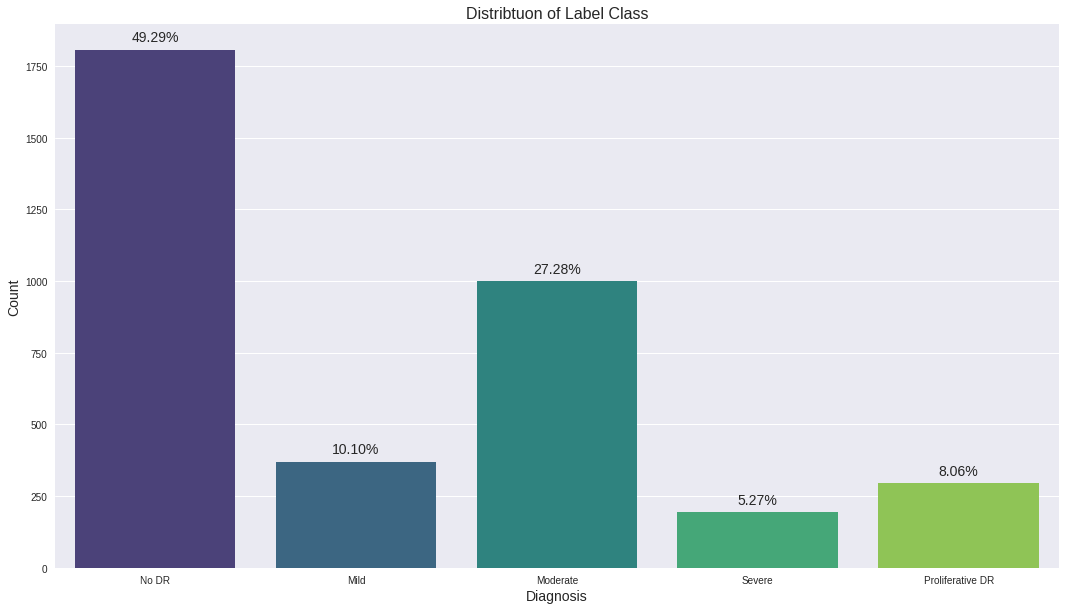

In [ ]:
label_pct = train['diagnosis'].value_counts(normalize = True).sort_index()
label_count = train['diagnosis'].value_counts().sort_index()

f, ax = plt.subplots()
ax = sns.countplot(x="diagnosis", data=train, palette="viridis")
sns.despine()

ax.set_xlabel('Diagnosis',fontsize = 14)
ax.set_ylabel('Count',fontsize = 14)
ax.set_xticklabels(labels.values())
ax.set_title('Distribtuon of Label Class',fontsize = 16)

for i in range(len(label_pct)):
    ax.annotate('{:.2%}'.format(label_pct[i]),(i,label_count[i] + 30),fontsize = 14,ha='center');

The count plot shows that the severity of DR is distributed unequally. No DR accounts for nearly half of the training data and Moderate accounts for around 27%, adding up to 77% approximatly. However, Servere and Proliferetive have less than 15% in total.

We may need to address this imblance problem later. The potential soulutions may involve in oversampling or undersampling techniques, using the right metric for model evaluation. 

## Sample Fundus Images Across Different Severity 

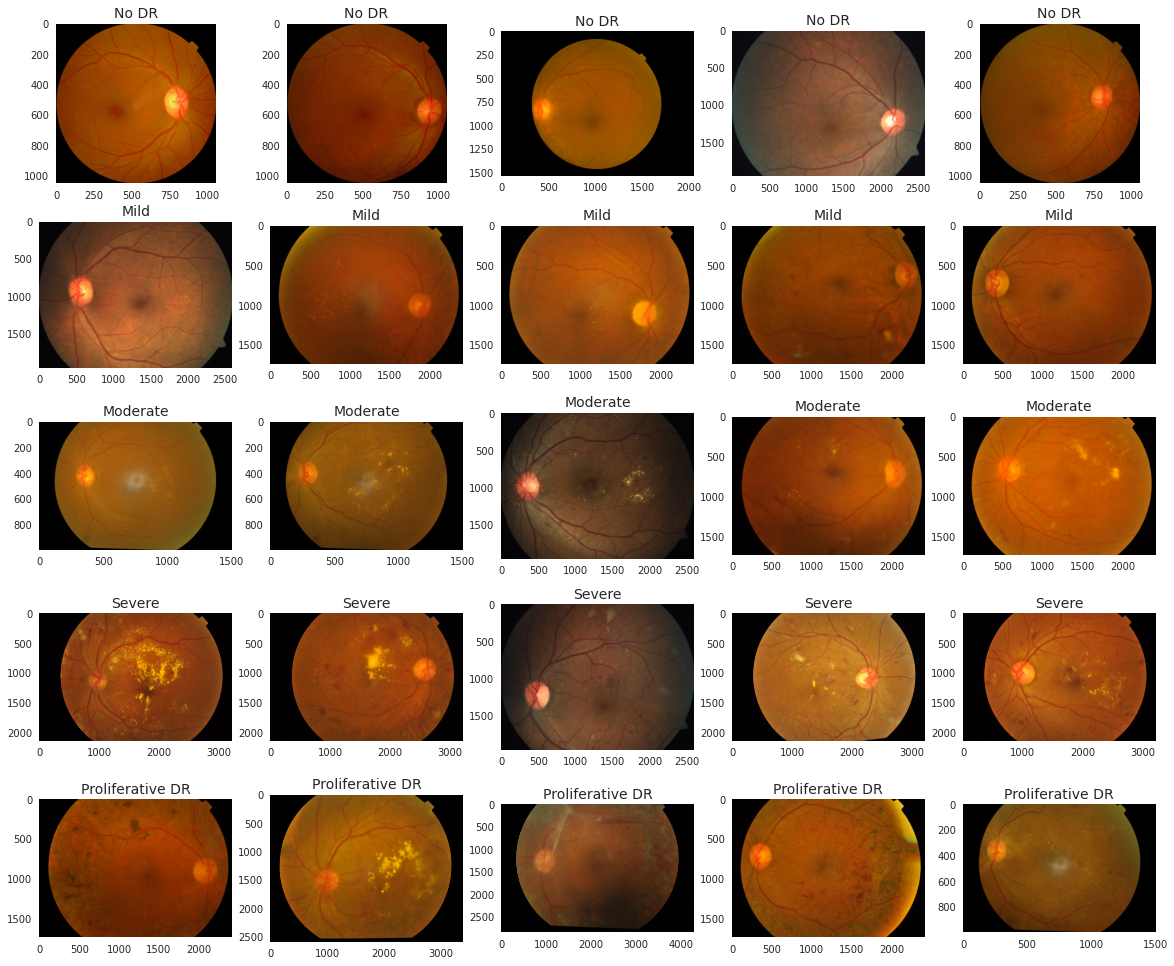

<Figure size 1296x720 with 0 Axes>

In [ ]:
sample_images = pd.DataFrame(columns = train.columns)

#random sample 4 images for each class
for i in range(5):
    label_class = train.loc[train.diagnosis == i].sample(5,random_state = 0)
    sample_images = pd.concat([sample_images,label_class],axis = 0)
    
visualize_img(sample_images,len(sample_images)//5,5);

* The sizes of the images are varying. We may need to resize them so that they have the same dimensions. 
* Some images have bad qualitiy, such as low brightness or contrast.
* As the serverity level incrases, the fundus images tends to have more light spots and be more cloudy. 


## Dectect Images with low brightness and contrast


Low image quality will largely increase the difficulty for the model the learning from the images. Low brightness,saturation and contrast will make some valuable information less obivous or add more noises. Thus, we would like to know if there any images with low brightness and contrast in our data set. If necessary, we could improve these images' quality.

In [ ]:
# plot some images that has low brightnes, saturation and contrast
sample_low_quality = rgb2hsv(train.iloc[:200])
sample_low_quality.head()

,id_code,diagnosis
0,0097f532ac9f,0
1,00b74780d31d,2
2,01f7bb8be950,0
3,0231642cf1c2,0
4,0551676cc2aa,0


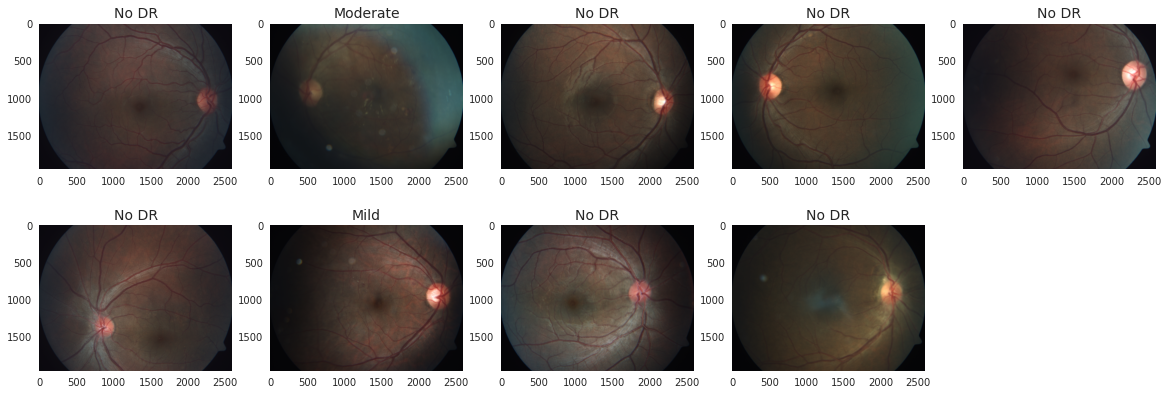

<Figure size 1296x720 with 0 Axes>

In [ ]:
#plot samples of low brightness and 
visualize_img(sample_low_quality,np.ceil(len(sample_low_quality)/5),5)

The sample images contains 3 different stages, No DR, Moderate,and Mild. But it's hard to tell how they distinct from others by our visual observation. There are some dim spots on Moderate(r1,c2) and Mild(r2,c2),yet they are not obvious.

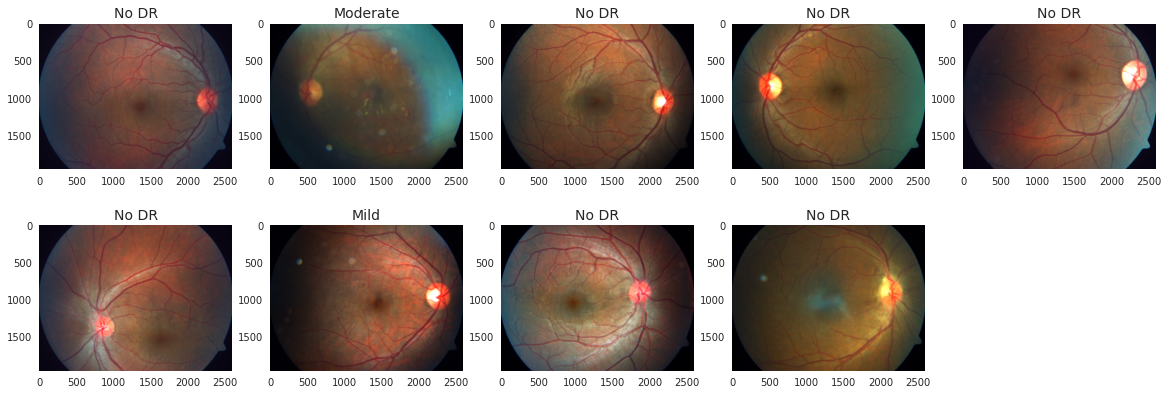

<Figure size 1296x720 with 0 Axes>

In [ ]:
#Let improve the brightness of the images and see if they look better
enhance_bright_contrast(sample_low_quality)

After the improvement, we can see more details. The blood vessels and the spots are more clear, which may provide more useful information since the higher stages of diabetic retinopathy will have the features of blood vessels proliferation and blocked vessels.